# Importing Libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Dataset

Data yang digunakan adalah data yang berasal dari Kaggle yaitu "Actual Transaction UK Retail".

Dataset dapat diakses melalui: https://www.kaggle.com/datasets/carrie1/ecommerce-data/data.

Selanjutnya, kita akan melakukan load data. Untuk membiasakan dengan real data, dalam projek ini data akan di-import secara manual dan dilakukan panggilan menggunakan fungsi DataFrame.

In [ ]:
## Load sumber data yang digunakan
# Data memiliki simbol pound dan karakter European lain sehingga agar terbaca, tambahkan 'latin1' pada pemanggilan data, atau gunakan 'cp1252' jika tidak bekerja.

import pandas as pd

df = pd.read_csv('Actual transactions from UK retailer.csv', encoding='latin1')
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

# Data Understanding

Sebelum kita melangkah lebih jauh, kita perlu memahami dulu sebenernya data apa yang kita punya.

Jadi, ini adalah dataset transaksi pembelian e-commerce di Inggris selama satu tahun. Toko yang berbasis London ini menjual hadiah dan homewares untuk orang dewasa dan anak-anak melalui website sejak 2007. Pembelinya berasal dari seluruh dunia dan biasanya melakukan pembelian secara pribadi. Dataset dapat dilihat berdasarkan tabel berikut:


|Column                       |Type     |Description |
|:------------------------------|:---------|:-----------|
InvoiceNo 			|Categorical| A six-digit unique number
StockCode 		|Categorical| The date associated with the stock inventory
Description 		|Categorical| Product/item name
Quantity 			|Numeric| The quantity of each product per transaction. Negative values related to cancelled transactions
InvoiceDate			|Numeric| The date when each transaction was generated
UnitPrice 		|Numeric| The price of each product per unit in pounds
CustomerID	|Categorical| A six-digit unique number that defines each customer
Country	|Categorical| Name of the country where the customer resides

# Data Cleaning

1. Pembuangan *cancelled order*

In [ ]:
mask = df['InvoiceNo'].str.contains('C')
mask

,InvoiceNo
0,False
1,False
2,False
3,False
4,False
...,...
541904,False
541905,False
541906,False
541907,False


In [ ]:
df[mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
cancelled_df = df[mask]
df = df[~mask]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    532621 non-null  object 
 1   StockCode    532621 non-null  object 
 2   Description  531167 non-null  object 
 3   Quantity     532621 non-null  int64  
 4   InvoiceDate  532621 non-null  object 
 5   UnitPrice    532621 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      532621 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.6+ MB




--- Akan dicek apakah data sudah cukup bersih.



In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134697
Country,0


--- Berdasarkan output yang diperoleh, data terlihat cukup bersih kecuali untuk data **Description** dan **CustomerID**. Tapi, kita lihat CustomerID berbentuk *float*, padahal biasanya *integer*. Jadi, kita akan merubah terlebih dahulu.

In [ ]:
# Identifikasi nilai non-integer di CustomerID
non_integers = df[~df['CustomerID'].apply(lambda x: x.is_integer() if pd.notna(x) else False)]
print(non_integers)

# Hapus nilai NaN (Not a Number) dari CustomerID
df = df.dropna(subset=['CustomerID'])

# Ubah CustomerID ke tipe integer (int64)
df['CustomerID'] = df['CustomerID'].astype('int64')


       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52       0.00         NaN  United Kin

--- Cek kembali data dan data terbukti sudah bersih.

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


2. Cek Duplikasi

In [ ]:
df.duplicated().sum()

5192

In [ ]:
# Eliminasi data yang terduplikasi

df.drop_duplicates(inplace = True)

In [ ]:
# Cek kembali duplikasi untuk memastikan data sudah bersih

df.duplicated().sum()

0

In [ ]:
# Tampilkan data

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


# Merubah DataFrame

Untuk merapihkan table data dan juga mempermudah analisis data, akan kita ubah terlebih dahulu data bulan dan tahunnya.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%m/%d/%Y %H:%M')

In [ ]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

In [ ]:
# Menampilkan data

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12


# Explatoratory Data Analysis

Nah, sekarang data sudah siap kita pakai untuk analisis data. Untuk memudahkan analisis, kita harus banget kepoin datanya. Mulai dari hal yang sederhana, kayak, "ini data apaan dah", sampai ke arah bisnis, seperti, "produk apa yang paling laku?"

Untuk melihat gambaran besar dari rupa data ini, akan aku list beberapa pertanyaan sebagai berikut.
1. Ada berapa banyak nilai unik untuk masing-masing kolom kategorik?
2. Selama 2021, produk apa saja yang paling banyak dibeli?
3. Selama 2021, bulan apa yang memiliki penjualan terbesar?
4. Produk apa saja yang memberikan pemasukan tertinggi?
5. Negara apa yang paling banyak membeli produk?
6. Negara apa yang paling memberi pemasukan terbesar?
7. Bagaimana kuantitas dan pemasukan tiap bulannya?
8. Bagaimana kuantitas dan pemasukan tiap harinya?
9. Dari hasil nomor 7 diperoleh bahwa Januari menjadi bulan dengan kuantitas dan pemasukan terbesar, sebutkan 5 produk dengan penjualan terbesar?
10. Dari hasil nomor 8 diperoleh bahwa dalam satu minggu hari Kamis menjadi hari dengan kuantitas dan pemasukan terbesar, sebutkan 5 produk dengan penjualan terbesar?



---



# Penyelesaian

1. Ada berapa banyak nilai unik untuk masing-masing kolom kategorik?

In [ ]:
object_columns = df.select_dtypes(include=['object']).nunique()

for column, unique_count in object_columns.items():
    print(f"Kolom '{column}' punya {unique_count} nilai unik.")

Kolom 'InvoiceNo' punya 18536 nilai unik.
Kolom 'StockCode' punya 3665 nilai unik.
Kolom 'Description' punya 3877 nilai unik.
Kolom 'Country' punya 37 nilai unik.


2. Selama 2021, produk apa yang paling banyak dibeli?

In [ ]:
top_10_sold_products = df.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()
print(top_10_sold_products)

                          Description  Quantity
0         PAPER CRAFT , LITTLE BIRDIE     80995
1      MEDIUM CERAMIC TOP STORAGE JAR     77916
2   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
3             JUMBO BAG RED RETROSPOT     46078
4  WHITE HANGING HEART T-LIGHT HOLDER     36706
5       ASSORTED COLOUR BIRD ORNAMENT     35263
6     PACK OF 72 RETROSPOT CAKE CASES     33670
7                      POPCORN HOLDER     30919
8                  RABBIT NIGHT LIGHT     27153
9             MINI PAINT SET VINTAGE      26076


3. Selama 2021, bulan apa yang memiliki penjualan terbesar?

<Axes: xlabel='Month'>

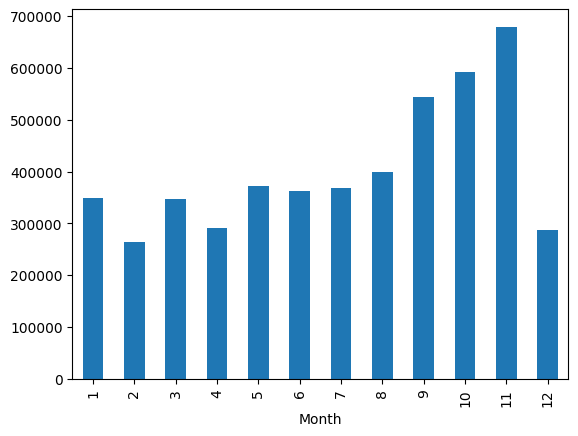

In [ ]:
df[df['Year']==2011].groupby('Month')['Quantity'].sum().plot(kind='bar')

4. Produk apa yang memberikan pemasukan tertinggi?

In [ ]:
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
total_revenue_per_product = df.groupby('Description')['TotalRevenue'].sum().nlargest(10).reset_index()

print(total_revenue_per_product)

                          Description  TotalRevenue
0         PAPER CRAFT , LITTLE BIRDIE     168469.60
1            REGENCY CAKESTAND 3 TIER     142264.75
2  WHITE HANGING HEART T-LIGHT HOLDER     100392.10
3             JUMBO BAG RED RETROSPOT      85040.54
4      MEDIUM CERAMIC TOP STORAGE JAR      81416.73
5                             POSTAGE      77803.96
6                       PARTY BUNTING      68785.23
7       ASSORTED COLOUR BIRD ORNAMENT      56413.03
8                              Manual      53419.93
9                  RABBIT NIGHT LIGHT      51251.24


5. Negara apa yang paling banyak membeli produk?

In [ ]:
total_quantity_per_country = df.groupby('Country')['Quantity'].sum().nlargest(10).reset_index()
print(total_quantity_per_country)

          Country  Quantity
0  United Kingdom   4254037
1     Netherlands    200937
2            EIRE    140383
3         Germany    119156
4          France    111429
5       Australia     84199
6          Sweden     36078
7     Switzerland     30083
8           Spain     27944
9           Japan     26016


<Axes: xlabel='Country'>

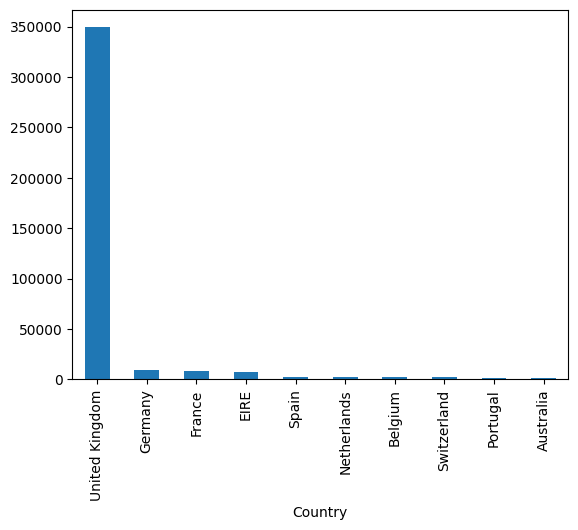

In [ ]:
# Plot

df['Country'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')

6. Negara apa yang paling memberi pemasukan terbesar?

In [ ]:
sum_price_per_country = df.groupby('Country')['TotalRevenue'].sum().nlargest(10).reset_index()
print(sum_price_per_country)

          Country  TotalRevenue
0  United Kingdom   7285024.644
1     Netherlands    285446.340
2            EIRE    265262.460
3         Germany    228678.400
4          France    208934.310
5       Australia    138453.810
6           Spain     61558.560
7     Switzerland     56443.950
8         Belgium     41196.340
9          Sweden     38367.830


<Axes: title={'center': 'Top 10 Countries by Total Revenue'}, xlabel='Country'>

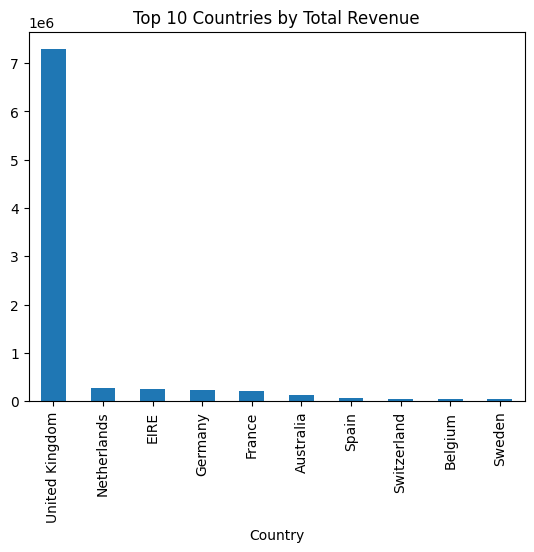

In [ ]:
# Plot

df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
top_countries_revenue = df.groupby('Country')['TotalRevenue'].sum()
top_countries_revenue = top_countries_revenue.sort_values(ascending=False).head(10)

top_countries_revenue.plot(kind='bar', title='Top 10 Countries by Total Revenue')



---



7. Bagaimana Kuantitas dan Pemasukan tiap bulannya?

In [ ]:
# Mengonversi kolom 'InvoiceDate' ke tipe datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Menambahkan kolom 'Month' yang berisi bulan dari 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.month

# Mengelompokkan berdasarkan bulan dan menghitung jumlah dan rata-rata untuk 'Quantity' dan 'TotalRevenue'
df.groupby('Month')[['Quantity', 'TotalRevenue']].agg(['sum', 'mean'])

Quantity            TotalRevenue           
           sum       mean          sum       mean
Month                                            
1       348522  16.603401   568101.310  27.064042
2       265043  13.449180   446084.920  22.635861
3       347623  12.936253   594081.760  22.107836
4       291369  12.987252   468374.331  20.876948
5       372948  13.283989   677355.150  24.126630
6       363014  13.481913   660046.050  24.513335
7       367372  13.820330   598962.901  22.532650
8       398190  14.860054   644051.040  24.035343
9       543654  13.704066   950690.202  23.964362
10      591551  12.122940  1035642.450  21.223921
11      678760  10.742933  1156205.610  18.299604
12      597840  14.001265  1087613.170  25.471631

8. Bagaimana Kuantitas dan Pemasukan untuk tiap harinya?

In [ ]:
# Mengonversi kolom 'InvoiceDate' ke tipe datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Menambahkan kolom 'dayofweek' yang berisi angka hari dalam minggu (0=Senin, 6=Minggu)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Mengelompokkan berdasarkan 'dayofweek' dan menghitung jumlah dan rata-rata untuk 'Quantity' dan 'TotalRevenue'
result = df.groupby('DayOfWeek')[['Quantity', 'TotalRevenue']].agg(['sum', 'mean'])

# Menambahkan nama hari dalam seminggu untuk keterbacaan (opsional)
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
result.index = result.index.map(day_names)
result

Quantity            TotalRevenue           
               sum       mean          sum       mean
DayOfWeek                                            
Monday      766919  11.938898  1363604.401  21.227710
Tuesday    1005772  15.297611  1697733.801  25.822225
Wednesday   960128  14.110607  1584283.830  23.283568
Thursday   1150224  14.512036  1973015.730  24.892956
Friday      821859  15.154782  1483080.811  27.347473
Sunday      460984   7.530696   785490.321  12.831874



---



9. Dari hasil nomor 7 diperoleh bahwa Januari menjadi bulan dengan kuantitas dan pemasukan terbesar, sebutkan 5 produk dengan penjualan terbesar?

In [ ]:
january_data = df[(df['Month'] == 1)]
january_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,TotalRevenue,DayOfWeek
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,2011,1,19.50,1
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011,1,10.50,1
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011,1,10.50,1
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,2011,1,10.50,1
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,2011,1,12.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
77621,542745,22617,BAKING SET SPACEBOY DESIGN,8,2011-01-31 16:47:00,4.95,15881,United Kingdom,2011,1,39.60,0
77622,542745,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,45,2011-01-31 16:47:00,2.10,15881,United Kingdom,2011,1,94.50,0
77623,542745,22138,BAKING SET 9 PIECE RETROSPOT,13,2011-01-31 16:47:00,4.95,15881,United Kingdom,2011,1,64.35,0
77624,542746,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-01-31 16:48:00,0.95,15881,United Kingdom,2011,1,1.90,0


In [ ]:
product_sales = january_data.groupby('Description')['Quantity'].sum()
product_sales

,Quantity
Description,
4 PURPLE FLOCK DINNER CANDLES,2
OVAL WALL MIRROR DIAMANTE,12
SET 2 TEA TOWELS I LOVE LONDON,416
10 COLOUR SPACEBOY PEN,276
12 COLOURED PARTY BALLOONS,80
...,...
ZINC HEART LATTICE T-LIGHT HOLDER,48
ZINC HEART LATTICE TRAY OVAL,2
ZINC METAL HEART DECORATION,308


In [ ]:
top_5_products = product_sales.sort_values(ascending=False).head(5)
top_5_products

,Quantity
Description,
MEDIUM CERAMIC TOP STORAGE JAR,74215
WHITE HANGING HEART T-LIGHT HOLDER,5461
PACK OF 72 RETROSPOT CAKE CASES,3326
FAIRY CAKE FLANNEL ASSORTED COLOUR,3240
BROCADE RING PURSE,3174


10. Dari hasil nomor 8 diperoleh bahwa dalam satu minggu hari Kamis menjadi hari dengan kuantitas dan pemasukan terbesar, sebutkan 5 produk dengan penjualan terbesar?

In [ ]:
thursday_data = df[df['InvoiceDate'].dt.dayofweek == 3]  # 3 represents Thursday
product_sales_thursday = thursday_data.groupby('Description')['Quantity'].sum()
top_5_products_thursday = product_sales_thursday.sort_values(ascending=False).head(5)

top_5_products_thursday

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,18107
JUMBO BAG RED RETROSPOT,11248
ASSORTED COLOUR BIRD ORNAMENT,11160
MINI PAINT SET VINTAGE,9288
POPCORN HOLDER,8505
